In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('NCDEX_data.csv')
dataset.head(2)

,Date,Close_Price
0,2-Jan-17,3068
1,3-Jan-17,3042


In [3]:
#dataset.drop(['Market Name','Commodity', 'Variety','Variety','Grade','Min Price (Rs./Quintal)','Max Price (Rs./Quintal)'], axis = 1,inplace=True)

In [4]:
dataset['Date']=pd.to_datetime(dataset['Date'])
#dataset['Date'] = pd.to_numeric(dataset['Date'] , errors = 'coerce')

In [5]:
dataset = dataset.set_index("Date")
#dataset.Date=dataset.Date.astype(str)

In [6]:
dataset

,Close_Price
Date,
2017-01-02,3068
2017-01-03,3042
2017-01-04,3018
2017-01-05,3027
2017-01-06,3028
...,...
2019-12-30,4464
2019-12-31,4436
2020-01-01,4456


In [7]:
#sns.pairplot(dataset)

In [8]:
X=dataset[0:.values
y=dataset.iloc[:,0].values
#X = dataset.iloc[:, 0:1].values
#y = dataset.iloc[:,1].values

In [9]:
X

array([3068, 3042, 3018, 3027, 3028, 2996, 2981, 2981, 2993, 3019, 3030,
       3130, 3123, 3124, 3073, 3098, 3090, 3068, 3046, 3031, 3036, 3044,
       3043, 3043, 3033, 3020, 3020, 3022, 2995, 2960, 2968, 2971, 2954,
       2894, 2879, 2919, 2897, 2895, 2895, 2908, 2937, 2923, 2917, 2899,
       2835, 2814, 2805, 2807, 2798, 2798, 2788, 2819, 2835, 2830, 2847,
       2953, 2892, 2876, 2879, 2887, 2861, 2855, 2870, 2870, 2879, 2856,
       2839, 2834, 2843, 2900, 2929, 2916, 2924, 2923, 2971, 3057, 3047,
       2986, 2966, 2940, 2934, 2893, 2841, 2863, 2896, 2874, 2865, 2844,
       2841, 2845, 2825, 2782, 2803, 2785, 2820, 2731, 2744, 2761, 2699,
       2696, 2696, 2717, 2666, 2674, 2701, 2745, 2754, 2700, 2733, 2744,
       2780, 2766, 2766, 2795, 2798, 2807, 2807, 2830, 2830, 2849, 2849,
       2844, 2844, 2822, 2822, 2854, 2854, 2916, 2916, 2958, 2958, 2939,
       2939, 2950, 2950, 2947, 2947, 3003, 3003, 2927, 2927, 2939, 2939,
       2900, 2900, 2900, 2900, 2897, 2897, 2903, 29

In [10]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [26]:
from keras import Sequential
from keras.layers import Dense

In [27]:
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=1,input_dim=1))
    regressor.add(Dense(1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
    return regressor

In [28]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=32,epochs=100)

In [29]:
results=regressor.fit(X,y)

Epoch 1/100
682/682 [==============================] - 0s 279us/step - loss: 11686654.7302 - mae: 3391.2170 - accuracy: 0.0015
Epoch 2/100
682/682 [==============================] - 0s 87us/step - loss: 10864199.1496 - mae: 3269.4504 - accuracy: 0.0015
Epoch 3/100
682/682 [==============================] - 0s 91us/step - loss: 10046204.7889 - mae: 3144.3621 - accuracy: 0.0015
Epoch 4/100
682/682 [==============================] - 0s 110us/step - loss: 9238941.8006 - mae: 3015.2839 - accuracy: 0.0015
Epoch 5/100
682/682 [==============================] - 0s 92us/step - loss: 8441566.3050 - mae: 2882.2739 - accuracy: 0.0015
Epoch 6/100
682/682 [==============================] - 0s 87us/step - loss: 7656404.1041 - mae: 2745.2122 - accuracy: 0.0015
Epoch 7/100
682/682 [==============================] - 0s 112us/step - loss: 6902774.5850 - mae: 2605.7954 - accuracy: 0.0015
Epoch 8/100
682/682 [==============================] - 0s 89us/step - loss: 6170376.3446 - mae: 2464.2441 - accuracy: 0

In [30]:
y_pred= regressor.predict(X)
y_pred

array([3.0681599e+03, 3.0421704e+03, 3.0181802e+03, 3.0271763e+03,
       3.0281763e+03, 2.9961890e+03, 2.9811953e+03, 2.9811953e+03,
       2.9931904e+03, 3.0191799e+03, 3.0301753e+03, 3.1301343e+03,
       3.1231372e+03, 3.1241367e+03, 3.0731577e+03, 3.0981472e+03,
       3.0901509e+03, 3.0681599e+03, 3.0461687e+03, 3.0311748e+03,
       3.0361726e+03, 3.0441694e+03, 3.0431699e+03, 3.0431699e+03,
       3.0331741e+03, 3.0201794e+03, 3.0201794e+03, 3.0221785e+03,
       2.9951895e+03, 2.9602039e+03, 2.9682007e+03, 2.9711995e+03,
       2.9542065e+03, 2.8942310e+03, 2.8792371e+03, 2.9192207e+03,
       2.8972297e+03, 2.8952305e+03, 2.8952305e+03, 2.9082251e+03,
       2.9372134e+03, 2.9232192e+03, 2.9172214e+03, 2.8992288e+03,
       2.8352551e+03, 2.8142637e+03, 2.8052673e+03, 2.8072666e+03,
       2.7982705e+03, 2.7982705e+03, 2.7882744e+03, 2.8192615e+03,
       2.8352551e+03, 2.8302573e+03, 2.8472502e+03, 2.9532068e+03,
       2.8922319e+03, 2.8762383e+03, 2.8792371e+03, 2.8872339e

In [19]:
#x=pd.DataFrame(y_pred)

In [20]:
#x.to_csv(r'/home/akash/soyabean/sawerdata/ANN_prediction.csv')

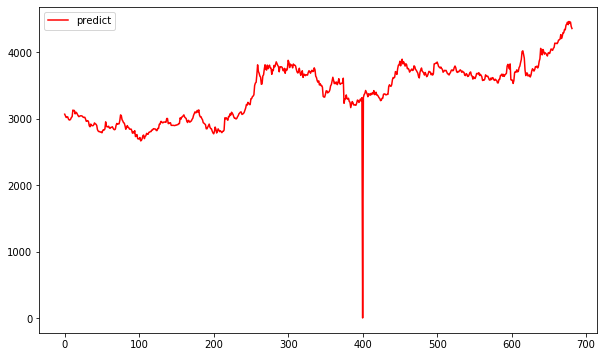

In [32]:
plt.figure(figsize=(10,6))
plt.plot(y_pred,color = 'red',label='predict')
#plt.plot(y,color = 'blue',label='actual')
plt.legend()
plt.show()

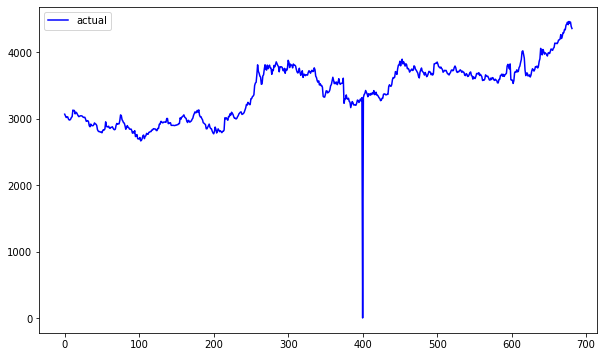

In [33]:
plt.figure(figsize=(10,6))
#plt.plot(y_pred,color = 'red',label='predict')
plt.plot(y,color = 'blue',label='actual')
plt.legend()
plt.show()